In [24]:
# Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#% matplotlib inline
from datetime import datetime

import plotly
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
nltk.download('maxent_ne_chunker')
nltk.download('words')

import string
import gensim
import collections
from gensim.corpora import Dictionary

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

from autocorrect import Speller

from bs4 import BeautifulSoup
import requests
import csv
import time

import re
import string
import gc
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/aditidutta/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/aditidutta/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/aditidutta/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [25]:
# gathering up all the data from the files received in via Google Scholar search 

df1 = pd.read_csv('data/2012.csv')
df2 = pd.read_csv('data/2013.csv')
df3 = pd.read_csv('data/2014.csv')
df4 = pd.read_csv('data/2015.csv')
df5 = pd.read_csv('data/2016.csv')
df6 = pd.read_csv('data/2017.csv')
df7 = pd.read_csv('data/2018.csv')
df8 = pd.read_csv('data/2019.csv')
df9 = pd.read_csv('data/2020.csv')
df10 = pd.read_csv('data/2021.csv')
df11 = pd.read_csv('data/2022.csv')


df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11], ignore_index=True)
df.head()

,Cites,Authors,Title,Year,Source,Publisher,ArticleURL,CitesURL,GSRank,QueryDate,...,StartPage,EndPage,ECC,CitesPerYear,CitesPerAuthor,AuthorCount,Age,Abstract,FullTextURL,RelatedURL
0,1,M Turno,'Dai che mi vesto da puttana!': Cultural Repre...,2012.0,NaN,Citeseer,https://citeseerx.ist.psu.edu/viewdoc/download...,https://scholar.google.com/scholar?cites=68233...,93,2022-07-17 10:02:25,...,NaN,NaN,1,0.1,1,1,10.0,"Nadia frantically tries to escape, chased by a...",https://citeseerx.ist.psu.edu/viewdoc/download...,https://scholar.google.com/scholar?q=related:x...
1,1,Z Vaisman,A Cognitive-Behavioral Therapy Model for the T...,2012.0,NaN,search.proquest.com,https://search.proquest.com/openview/e9d6eb306...,https://scholar.google.com/scholar?cites=14365...,27,2022-07-17 10:02:25,...,NaN,NaN,1,0.1,1,1,10.0,… to impose such a classification in our next ...,NaN,https://scholar.google.com/scholar?q=related:P...
2,0,J Lammi,A genre analysis of Iain M. Banks' The Player ...,2012.0,NaN,erepo.uef.fi,https://erepo.uef.fi/bitstream/handle/12345678...,NaN,82,2022-07-17 10:02:25,...,NaN,NaN,0,0.0,0,1,10.0,… Sentient artificial intelligence has also be...,https://erepo.uef.fi/bitstream/handle/12345678...,https://scholar.google.com/scholar?q=related:n...
3,31,MR Davidson,A nurse's guide to women's mental health,2012.0,NaN,books.google.com,https://books.google.com/books?hl=en&lr=&id=I3...,https://scholar.google.com/scholar?cites=15456...,37,2022-07-17 10:02:25,...,NaN,NaN,31,3.1,31,1,10.0,Named a 2013 Doody's Core Title! 2012 Third Pl...,NaN,https://scholar.google.com/scholar?q=related:8...
4,3,A Wright,A review of best practices in child welfare,2012.0,NaN,books.google.com,https://books.google.com/books?hl=en&lr=&id=hg...,https://scholar.google.com/scholar?cites=13797...,48,2022-07-17 10:02:25,...,NaN,NaN,3,0.3,3,1,10.0,"… the child welfare field, as BP provide the i...",http://phoenixsinclairinquiry.ca/exhibits/exhi...,https://scholar.google.com/scholar?q=related:h...


In [26]:
# View the columns
df.columns

Index(['Cites', 'Authors', 'Title', 'Year', 'Source', 'Publisher',
       'ArticleURL', 'CitesURL', 'GSRank', 'QueryDate', 'Type', 'DOI', 'ISSN',
       'CitationURL', 'Volume', 'Issue', 'StartPage', 'EndPage', 'ECC',
       'CitesPerYear', 'CitesPerAuthor', 'AuthorCount', 'Age', 'Abstract',
       'FullTextURL', 'RelatedURL'],
      dtype='object')

In [27]:
df[['ArticleURL']].iloc[10]  #not in full-text #difficult to scrape web data

ArticleURL    https://link.springer.com/article/10.1007/s105...
Name: 10, dtype: object

In [28]:
df['Source'].value_counts()

# shows a lot of preprints, and it occupies the largest share of the lot

arXiv preprint arXiv …                                   85
api.taylorfrancis.com                                    34
researchgate.net                                         27
Journal of …                                             26
Proceedings of the …                                     24
                                                         ..
CENTRAL EUROPEAN POLITICAL SCIENCE                        1
The Kaleidoscope of Gender: Prisms, Patterns, and …       1
Busted! The Truth about the 50 Most Common Internet …     1
Psychology, Crime & Law                                   1
CHI Conference on Human Factors in …                      1
Name: Source, Length: 1581, dtype: int64

In [29]:
df['Source'].isna().count() 
# The high number of NA could be because of a large number of preprints

3892

### Years

In [30]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.strftime('%Y')
df = df[~(df['Year'] < '2012')] # Seems like there were a few examples which dated before 2012

In [31]:
n_years = df['Year'].value_counts().reset_index(name='total')
n_years = n_years.sort_values(by="index", ascending=False)[["index", "total"]]
n_years

,index,total
2,2022,528
0,2021,883
1,2020,553
3,2019,462
4,2018,334
5,2017,237
6,2016,175
8,2015,108
7,2014,124
9,2013,107


In [32]:
fig = make_subplots(rows=1, cols=1, specs=[[{"type": "bar"}]])

fig.add_trace(go.Bar(
     x=n_years['index'], y=n_years['total'], showlegend=False,
    text =n_years['total'], 
     name="Years"), 
     row=1, col=1)
fig.update_traces(textposition='outside', marker_line_color='rgb(8,48,107)',  marker_line_width=1.5)
fig.update_yaxes(range=[0,1000])
fig.show()

### Publishers

In [33]:
df['Publisher'].unique()

array(['Citeseer', 'search.proquest.com', 'erepo.uef.fi',
       'books.google.com', 'liebertpub.com', 'api.taylorfrancis.com',
       'Taylor & Francis', 'Springer', 'scipedia.com',
       'taylorfrancis.com', 'thescholarship.ecu.edu', 'theses.fr', nan,
       'blancharder.wordpress.com', 'dc.etsu.edu', 'journals.sagepub.com',
       'academiccommons.columbia.edu', 'lurepository.lakeheadu.ca',
       'psycnet.apa.org', 'core.ac.uk', 'researchgate.net',
       'jbe-platform.com', 'd.lib.msu.edu', 'summit.sfu.ca',
       'scholarworks.boisestate.edu', 'kisseng.kstudy.com',
       'studenttheses.uu.nl', 'stars.library.ucf.edu',
       'dr.library.brocku.ca', 'utpjournals.press',
       'digital.lib.washington.edu', 'deepblue.lib.umich.edu',
       'academia.edu', 'existenz.us', 'openaccess.wgtn.ac.nz',
       'tel.archives-ouvertes.fr', 'torrossa.com', 'Google Patents',
       'dashboard.commons.pacificu.edu',
       'research-repository.griffith.edu.au', 'etd.ceu.edu', 'tdx.cat',
      

In [34]:
df['Publisher'] = df['Publisher'].replace(['taylorfrancis.com', 'api.taylorfrancis.com'],'Taylor & Francis')
df['Publisher'] = df['Publisher'].replace(['search.proquest.com'],'ProQuest')
df['Publisher'] = df['Publisher'].replace(['taylorfrancis.com', 'api.taylorfrancis.com'],'Taylor & Francis')
df['Publisher'] = df['Publisher'].replace(['books.google.com'],'Google Books')
df['Publisher'] = df['Publisher'].replace(['erepo.uef.fi'],'UEF eRepo')
df['Publisher'] = df['Publisher'].replace(['arxiv.org'],'arXiv')
df['Publisher'] = df['Publisher'].replace(['journals.sagepub.com'],'SAGE Publications')
df['Publisher'] = df['Publisher'].replace(['dl.acm.org'],'ACM Digital Library')
df['Publisher'] = df['Publisher'].replace(['aclanthology.org'],'ACL Anthology')
df['Publisher'] = df['Publisher'].replace(['ieeexplore.ieee.org'],'IEEE Xplore')
df['Publisher'] = df['Publisher'].replace(['papers.ssrn.com'],'SSRN eLibrary')
df['Publisher'] = df['Publisher'].replace(['mdpi.com'],'MDPI')
df['Publisher'] = df['Publisher'].replace(['researchgate.net'],'ResearchGate')
df['Publisher'] = df['Publisher'].replace(['psycnet.apa.org'],'APA Psycnet')
df['Publisher'] = df['Publisher'].replace(['library.oapen.org'],'OAPEN')
df['Publisher'] = df['Publisher'].replace(['ceur-ws.org'],'CEUR Workshop')
df['Publisher'] = df['Publisher'].replace(['academia.edu'],'Academia.edu')
df['Publisher'] = df['Publisher'].replace(['emerald.com'],'Emerald Publishing')
df['Publisher'] = df['Publisher'].replace(['academic.oup.com'],'Oxford Academic')


In [35]:
# Viewing only top 20 publishers to check their count
n_publishers = df['Publisher'].value_counts().reset_index(name='total')[:20]
n_publishers = n_publishers.sort_values(by="total", ascending=False)[["index", "total"]]
n_publishers

,index,total
0,Taylor & Francis,706
1,Google Books,483
2,ProQuest,387
3,Springer,220
4,arXiv,148
5,SAGE Publications,66
6,ACM Digital Library,62
7,Elsevier,53
8,ACL Anthology,51
9,IEEE Xplore,51


In [36]:
fig = make_subplots(rows=1, cols=1, specs=[[{"type": "bar"}]])

fig.add_trace(go.Bar(
     x=n_publishers['index'], y=n_publishers['total'], showlegend=False,
    text =n_publishers['total'],
     name="Top 20 Publishers"), 
     row=1, col=1)
fig.update_traces(textposition='outside', marker_line_color='rgb(8,48,107)',  marker_line_width=1)
fig.update_yaxes(range=[0,800])
fig

In [37]:
# Viewing the top 10 publishers vs the others

colors = ['#1F77B4', '#FF7F0E', '#2CA02C', 'rgb(255, 255, 51)', 'rgb(127, 60, 141)', '#8C564B', '#BCBD22', '#17BECE', '#7F7F7F', '#222A2A', 'rgb(228, 26, 28)']

top10pubs = df['Publisher'].value_counts()[:10].reset_index(name='total')

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])

fig.add_trace(go.Bar(
     x=top10pubs['index'], y=top10pubs['total'], showlegend=False,
    text =top10pubs['total'],
     name="Top 10 publications"), 
     row=1, col=1)
fig.update_yaxes(range=[0,750])
fig.update_layout(uniformtext_minsize=8)
fig.update_traces(textposition='outside', marker_color=colors, marker_line_color='rgb(8,48,107)',  marker_line_width=1.5)

list_top10pubs = list(df['Publisher'].value_counts()[:10].keys())

others_count = len(df.loc[~df['Publisher'].isin(list_top10pubs)].dropna(subset=['Publisher']))
new_row = {'index': 'Others', 'total':others_count}
top10pubs = top10pubs.append(new_row, ignore_index=True)

# pull is given as a fraction of the pie radius
fig.add_trace(go.Pie(
     values=top10pubs['total'],
     labels=top10pubs['index'].values, pull=[0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025], hole=.3, 
    marker_colors=colors,
     name="Publication groups"),
    row=1, col=2)
fig.update_layout(title_text='Top 10 publications with most works on misogyny', title_x=0.5, title_y=0.985,
                 legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5))

fig.show()



In [38]:
df['Source'].unique()

array([nan, "Journal of Women's Health", 'Journal of Sexual Aggression',
       ..., 'LGBTQ+ Family: An Interdisciplinary Journal',
       'Journal of Library …', 'CHI Conference on Human Factors in …'],
      dtype=object)

In [39]:
df['Type'].unique() #not useful AT ALL

array(['PDF', 'BOOK', nan, 'HTML', 'CITATION', 'TXT'], dtype=object)

In [40]:
# Grouping the manuscript types together

L = ['conference', 'journal', 'article', 'thesis', 'dissertation', 
     'handbook', 'report', 'book', 'encyclopedia', 'research']
# article can be termed similar to journals, since usually they come together


pat = '|'.join(r"\b{}\b".format(x) for x in L)

df['Type of Source'] = df['Source'].str.findall(pat, flags=re.I).str.join(', ')

df['Type of Source'].value_counts() # shows using 'research' as a keyword is redundant, and usually the other keyword is the important one
# Also hence use extract instead of findall, and arrange the order of the keywords according to preference

                          1599
Journal                    366
Conference                  59
Handbook                    33
Encyclopedia                27
Research                    18
Journal, Research           16
journal                     13
handbook                     8
research                     7
Research, Encyclopedia       3
Dissertation                 2
Thesis                       2
journal, research            2
Journal, research            2
Handbook, Research           2
JOURNAL                      1
Journal, Conference          1
Book                         1
conference                   1
Conference, Research         1
Name: Type of Source, dtype: int64

In [41]:
df['Type of Source'] = df['Source'].str.extract('('+ pat + ')', expand=False, flags=re.I)
df['Type of Source'] = df['Type of Source'].replace(['journal', 'JOURNAL'],'Journal')
df['Type of Source'] = df['Type of Source'].replace(['conference'],'Conference')
df['Type of Source'] = df['Type of Source'].replace(['handbook', 'Handbook', 'Encyclopedia'],'Book') # Can encyclopedia be clubbed as well?
# and should I keep 'book' instead of handbook
df['Type of Source'] = df['Type of Source'].replace(['Dissertation', 'Research', 'research'],'Thesis') # can research also be clubbed with this?

df['Type of Source'].value_counts()

Journal       401
Book           71
Conference     61
Thesis         32
Name: Type of Source, dtype: int64

In [42]:
df_sources = pd.DataFrame({
    'sources': df['Type of Source'].dropna().unique(),
    'count': df['Type of Source'].value_counts().tolist()
})


color_discrete_map = {df_sources['sources'][0]: '#FC6955', 
                      df_sources['sources'][1]: 'rgb(255, 255, 51)', 
                      df_sources['sources'][2]: 'black',
                      df_sources['sources'][3]: 'rgb(47, 138, 196)'}
fig = px.bar(df_sources, x="sources", y="count", color= "sources", color_discrete_map=color_discrete_map,
            hover_data=['sources'], text ='count')
fig.update_layout(title_text='Sources of manuscripts', title_x=0.5, title_y=0.92,
    legend=dict(
    yanchor="top",
    y=0.59,
    xanchor="right",
    x=0.79
))
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_traces(textposition='outside')
fig.show()

<AxesSubplot: xlabel='Publisher'>

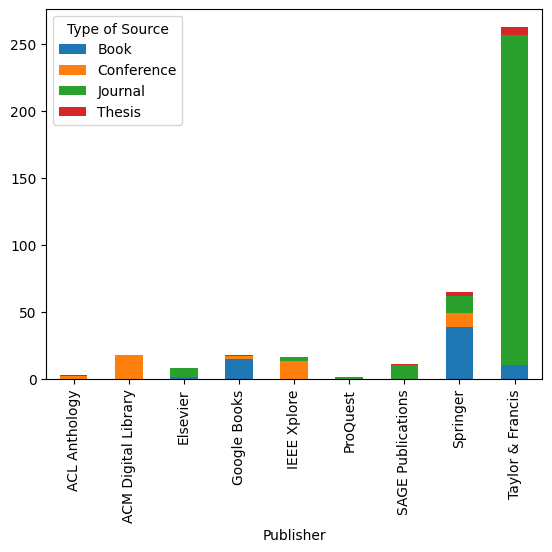

In [43]:
# Type of sources and publisher

list_top10pubs = list(df['Publisher'].value_counts()[:10].keys())
df_pub_source= df.loc[df['Publisher'].isin(list_top10pubs)]
df_pub_source = df_pub_source.groupby(['Type of Source','Publisher']).size().reset_index().rename(columns={0:'count'})
df_pub_source= df_pub_source.sort_values(['Publisher', 'count'],axis=0,ascending=False)
df_pub_source
# arXiv not there as all are preprints

df_pub_source.pivot(index=["Publisher"], columns='Type of Source', values='count').plot(kind='bar', stacked=True)


In [44]:
# Top 10 publishers with their count of manuscripts
fig = px.bar(df_pub_source, x="count", y="Publisher", color="Type of Source",
            hover_data=['Publisher'], barmode = 'stack',
            color_discrete_map={
                'Journal': '#FC6955',
                'Book': 'rgb(255, 255, 51)',
                'Thesis': 'black',
                'Conference': 'rgb(47, 138, 196)'
                     }, text ='count')
fig.update_layout(title_text='Top 10 publications by their sources', title_x=0.5, title_y=0.92,
    legend=dict(
    yanchor="top",
    y=0.59,
    xanchor="right",
    x=0.79
))
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_traces(textposition='outside')
fig.show()

### Type of sources and conferences

In [52]:
# However including the exclusion criteria, we only take the ones which are 
# 1. published through conferences/journals
# 2. the preprints

df_conf_jour = df[(df["Type of Source"].isin(['Conference', 'Journal'])) | (df["Publisher"] == 'arXiv')]
df_conf_jour['Type of Source'] = df_conf_jour['Type of Source'].fillna('Preprints') # replacing nans with preprints
df_conf_jour

,Cites,Authors,Title,Year,Source,Publisher,ArticleURL,CitesURL,GSRank,QueryDate,...,ECC,CitesPerYear,CitesPerAuthor,AuthorCount,Age,Abstract,FullTextURL,RelatedURL,Type of Source,Platform of interest
5,0,"JD Nagel, J Rudick",Abstracts from the NIH Office of Research on W...,2012,Journal of Women's Health,liebertpub.com,https://www.liebertpub.com/doi/full/10.1089/jw...,NaN,21,2022-07-17 10:02:25,...,0,0.0,0,2,10.0,"… following activation by calcium, 5 pM tissue...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN,Journal,
9,129,"A Pina, TA Gannon","An overview of the literature on antecedents, ...",2012,Journal of Sexual Aggression,Taylor & Francis,https://www.tandfonline.com/doi/abs/10.1080/13...,https://scholar.google.com/scholar?cites=10841...,19,2022-07-17 10:02:25,...,129,12.9,65,2,10.0,The detrimental effects of sexual harassment h...,https://kar.kent.ac.uk/25836/2/Pina%20%26%20Ga...,https://scholar.google.com/scholar?q=related:c...,Journal,
12,23,MG Durham,"Blood, lust and love: Interrogating gender vio...",2012,Journal of Children and Media,Taylor & Francis,https://www.tandfonline.com/doi/abs/10.1080/17...,https://scholar.google.com/scholar?cites=90340...,33,2022-07-17 10:02:25,...,23,2.3,23,1,10.0,"… point of view, thus strengthening the reader...",https://www.tandfonline.com/doi/pdf/10.1080/17...,https://scholar.google.com/scholar?q=related:u...,Journal,
25,9,M O'Connell,"Don't act, don't tell: Discrimination based on...",2012,Journal of Gay & Lesbian Mental Health,Taylor & Francis,https://www.tandfonline.com/doi/abs/10.1080/19...,https://scholar.google.com/scholar?cites=18134...,24,2022-07-17 10:02:25,...,9,0.9,9,1,10.0,"… , bullying, suicides, and hate crimes agains...",NaN,https://scholar.google.com/scholar?q=related:H...,Journal,
27,25,EC Bishop,Examining the raunch culture thesis through yo...,2012,Journal of Youth Studies,Taylor & Francis,https://www.tandfonline.com/doi/abs/10.1080/13...,https://scholar.google.com/scholar?cites=90923...,35,2022-07-17 10:02:25,...,25,2.5,25,1,10.0,… Pornography was conceptualised as the epitom...,http://ecite.utas.edu.au/78545/3/78545%20-%20E...,https://scholar.google.com/scholar?q=related:g...,Journal,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3875,0,"J Lloyd, V Bradbury",Zero tolerance to sexual harm in schools–from ...,2022,Journal of Sexual Aggression,Taylor & Francis,https://www.tandfonline.com/doi/abs/10.1080/13...,NaN,444,2022-07-17 13:58:58,...,0,0.0,0,2,1.0,… they do not recognise harmful sexual inciden...,https://www.tandfonline.com/doi/pdf/10.1080/13...,https://scholar.google.com/scholar?q=related:J...,Journal,
3880,0,E Castro,“How every Black man should be”: Historical na...,2022,The Journal of Social Studies Research,Elsevier,https://www.sciencedirect.com/science/article/...,NaN,403,2022-07-17 13:58:58,...,0,0.0,0,1,1.0,This case study is a sociocultural analysis of...,NaN,https://scholar.google.com/scholar?q=related:N...,Journal,
3881,0,C Horton,“I Was Losing That Sense of Her Being Happy”—T...,2022,LGBTQ+ Family: An Interdisciplinary Journal,Taylor & Francis,https://www.tandfonline.com/doi/abs/10.1080/27...,NaN,493,2022-07-17 13:58:58,...,0,0.0,0,1,1.0,"… So as a concept I absolutely hate it, and wo...",https://www.tandfonline.com/doi/pdf/10.1080/27...,https://scholar.google.com/scholar?q=related:V...,Journal,
3887,1,"A Glusker, C Emmelhainz, N Estrada…",“Viewed as Equals”: The Impacts of Library Org...,2022,Journal of Library …,Taylor & Francis,https://www.tandfonline.com/doi/abs/10.1080/01...,https://scholar.google.com/scholar?cites=70832...,438,2022-07-17 13:58:58,...,1,1.0,0,4,1.0,… Staff who reported low morale were often in ...,https://www.tandfonline.com/doi/pdf/10.1080/01...,https://scholar.google.com/scholar?q=related:I...,Journal,


In [53]:
df_conf_jour_yr = df_conf_jour.groupby(['Year', 'Type of Source']).size().reset_index().rename(columns={0:'Count'})
df_conf_jour_yr= df_conf_jour_yr.sort_values(['Year'],axis=0,ascending=False)


fig = px.bar(df_conf_jour_yr, y="Count", x="Year", color="Type of Source",
            hover_data=['Year'], barmode = 'stack',
            color_discrete_map={
                'Journal': '#FC6955',
                'Preprints': 'rgb(255, 255, 51)',
                'Conference': 'rgb(47, 138, 196)'
                     }, text ='Count')
fig.update_layout(title_text='Sources by the years', title_x=0.5, title_y=0.92,
    legend=dict(
    yanchor="top",
    y=0.59,
    xanchor="right",
    x=0.79
))
fig.update_layout(yaxis={'categoryorder':'total descending'})
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_traces(textposition='outside')
fig.show()


### Sources and their subjects

In [45]:
df['Source'].value_counts()

arXiv preprint arXiv …                                   85
api.taylorfrancis.com                                    34
researchgate.net                                         27
Journal of …                                             26
Proceedings of the …                                     24
                                                         ..
CENTRAL EUROPEAN POLITICAL SCIENCE                        1
The Kaleidoscope of Gender: Prisms, Patterns, and …       1
Busted! The Truth about the 50 Most Common Internet …     1
Psychology, Crime & Law                                   1
CHI Conference on Human Factors in …                      1
Name: Source, Length: 1580, dtype: int64

In [46]:
df_sou_sub = df[['Source', 'Type of Source']]
df_sou_sub = df_sou_sub.loc[~df_sou_sub['Type of Source'].isna()] # Removing the nan values
df_sou_sub = df_sou_sub.loc[~(df_sou_sub['Type of Source'] == 'Thesis')] # Removing the thesis type



df_sou_sub = pd.DataFrame({
    'Source': df_sou_sub['Source'].unique().tolist(),
    'counts': df_sou_sub['Source'].value_counts()
}).reset_index(drop=True)


## Function to get the columns with specific words such as journals or conference
def get_keywords(x, y):
    tokens = nltk.tokenize.word_tokenize(x)
    #keywords_exist = [keyword for keyword in tokens if keyword in y]
    keywords = [keyword for keyword in tokens if keyword in y]
    keywords_string = ', '.join(keywords)
    return keywords_string

## These are the key words.  The pairs belong to separate lists--(journals, conferences) in 
## either order.  These lists tend to grow as more keywords are discovered.
journal_items = ['journal', 'journals', 'Journal', 'Journals', 'JOURNAL']
conference_items = ['conference', 'conferences', 'Conference', 'Conferences']
book_items = ['Book', 'book', 'Handbook', 'handbook', 'Encyclopedia']

# the apply(lambda) is slow but I don't mind it.
df_sou_sub['journals'] = df_sou_sub['Source'].apply(lambda x: get_keywords(x, journal_items))
df_sou_sub['conferences'] = df_sou_sub['Source'].apply(lambda x: get_keywords(x, conference_items)) 
df_sou_sub['books'] = df_sou_sub['Source'].apply(lambda x: get_keywords(x, book_items)) 

df_sou_sub

,Source,counts,journals,conferences,books
0,Journal of Women's Health,26,Journal,,
1,Journal of Sexual Aggression,18,Journal,,
2,Handbook of Psychology and Sexual Orientation,15,,,Handbook
3,Journal of Children and Media,8,Journal,,
4,Journal of Gay & Lesbian Mental Health,7,Journal,,
...,...,...,...,...,...
373,International Conference on Information,1,,Conference,
374,The Journal of Social Studies Research,1,Journal,,
375,LGBTQ+ Family: An Interdisciplinary Journal,1,Journal,,
376,Journal of Library …,1,Journal,,


### Social Media

In [48]:
social_media_lst = ["twitter", "facebook", "reddit", "instagram", "whatsapp",
                    "gab", "2chan", "4chan", "8chan", "youtube", "linkedin", "tumblr"]

pattern = '|'.join(r"\b{}\b".format(x) for x in social_media_lst)
df["Platform of interest"] = df['Abstract'].str.findall(pattern, flags=re.I).str.join(' ')
df["Platform of interest"].unique()

array(['', nan, 'Facebook', 'Twitter', 'YouTube', 'Facebook Twitter',
       '4Chan', 'twitter', '4chan', '4chan 8chan', 'Twitter Gab',
       'Facebook Instagram', 'Gab', 'Instagram', 'Reddit', 'gab',
       'YouTube Twitter twitter', 'LinkedIn Twitter Facebook Instagram',
       'Twitter Twitter'], dtype=object)

In [54]:
# taking in only the platforms which showed in the string extraction
twitter_count = df["Platform of interest"].str.lower().str.contains('twitter').sum()
fb_count = df["Platform of interest"].str.lower().str.contains('facebook').sum()
fourchan_count = df["Platform of interest"].str.lower().str.contains('4chan').sum()
eightchan_count = df["Platform of interest"].str.lower().str.contains('8chan').sum()
youtube_count = df["Platform of interest"].str.lower().str.contains('youtube').sum()
gab_count = df["Platform of interest"].str.lower().str.contains('gab').sum()
instagram_count = df["Platform of interest"].str.lower().str.contains('instagram').sum()
reddit_count = df["Platform of interest"].str.lower().str.contains('reddit').sum()
linkedin_count = df["Platform of interest"].str.lower().str.contains('linkedin').sum()


df_social_media_counts = pd.DataFrame({'Social Media Platforms': ['Twitter', 'Facebook', '4chan', '8chan',
                                                                 'YouTube', 'Gab', 'Instagram', 'Reddit', 'LinkedIn'], 
                                       'Counts': [twitter_count, fb_count, fourchan_count, eightchan_count,
                                                 youtube_count, gab_count, instagram_count, reddit_count, linkedin_count]})

fig = px.bar(df_social_media_counts, x='Counts', y='Social Media Platforms', text='Counts', color='Social Media Platforms')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_traces(textposition='outside')
fig.update_layout(showlegend=False)

'''
fig.add_annotation(
        x=30,
        y=3,
        xref="x",
        yref="y",
        text="Twitter seems to be the most sought after social media platform, <br> exceeding much ahead of the other platforms in the list. <br> Overall the top 2 platforms- Twitter and Facebook <br> outnumber the other platforms, even though some of them,<br> e.g., Reddit, Gab and 4chan have been known for their misogynistic contents.",
        showarrow=False,
        font=dict(
            family="Muli, sans-serif",
            size=14,
            color="#222A2A"
            ),
        align="center",
        arrowcolor="#636363",
        ax=120,
        ay=-20,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ffffff",
        opacity=0.8
        )
'''

fig.show()


#### Joining the title and abstract for further analysis

In [55]:
df_conf_jour['Title & Abstract'] = df_conf_jour['Title'] + ' ' + df_conf_jour['Abstract']


#nltk.download('punkt');
#nltk.download('stopwords');

def preprocess_text(text):
    spell = Speller(lang='en') #check spellings 
    text = spell(text) # does not seem to work well on this. Works better on individual sentences
    tokens = nltk.word_tokenize(text) #tokenize
    text = [w for w in tokens if w.isalpha()]  
    stops = set(stopwords.words("english")) #eliminate stopwords
    text = [word for word in text if not word in stops]
    stemmer = PorterStemmer() #stemming
    text = [stemmer.stem(word) for word in text]
    return ( " ".join(text)) #rejoin the words


df_conf_jour['Title & Abstract'] = df_conf_jour.apply(lambda x: preprocess_text(x['Title & Abstract']), axis=1)
df_conf_jour['Title & Abstract']

5       abstract nih offic research women health ninth...
9       an overview literatur anteced percept behaviou...
12      blood lust love interrog gender violenc twilig...
25      do act tell discrimin base gender nonconform e...
27      examin launch cultur thesi young australian wo...
                              ...                        
3875    zero toler sexual harm broken rule broken syst...
3880    how everi black man histor narr construct iden...
3881    i wa lose that sens her be happi children dela...
3887    view equal the impact librari organiz cultur m...
3890    you prove threat real understand need femal jo...
Name: Title & Abstract, Length: 610, dtype: object

In [56]:
spell = Speller(lang='en') #check spellings 
text = spell('how everi black man histor narr construct')
text #works fine in here

'how every black man history rarr construct'

In [57]:
df_conf_jour['ArticleURL'].iloc[10]

'https://www.tandfonline.com/doi/abs/10.1080/15538605.2012.726150'

In [58]:
len(df_conf_jour), len(df_conf_jour['ArticleURL'].unique()) #So all the studies here come with their url link

(610, 610)

In [59]:
# first converting all the links into a list 
list_urls = list(df_conf_jour['ArticleURL'].unique())
list_urls

['https://www.liebertpub.com/doi/full/10.1089/jwh.2012.ab02',
 'https://www.tandfonline.com/doi/abs/10.1080/13552600.2010.501909',
 'https://www.tandfonline.com/doi/abs/10.1080/17482798.2011.619549',
 'https://www.tandfonline.com/doi/abs/10.1080/19359705.2012.658013',
 'https://www.tandfonline.com/doi/abs/10.1080/13676261.2012.693597',
 'https://link.springer.com/chapter/10.1007/978-3-642-34103-8_17',
 'https://www.tandfonline.com/doi/abs/10.1080/15377938.2012.722883',
 'https://www.tandfonline.com/doi/abs/10.1080/10894160.2011.605009',
 'https://www.tandfonline.com/doi/abs/10.1080/19359705.2012.671126',
 'https://www.tandfonline.com/doi/abs/10.1080/10894160.2011.557641',
 'https://www.tandfonline.com/doi/abs/10.1080/15538605.2012.726150',
 'https://www.jbe-platform.com/content/journals/10.1075/ijcl.17.2.05pre',
 'https://www.tandfonline.com/doi/abs/10.1080/09518398.2012.720729',
 'https://www.tandfonline.com/doi/abs/10.1080/00224499.2011.637247',
 'https://www.tandfonline.com/doi/abs/

In [60]:
# Only the arXiv manuscripts
df_archive = df[(df["Publisher"] == 'arXiv')]
urls_only = list(df_archive['ArticleURL'].unique())
urls_only

['https://arxiv.org/abs/1812.02712',
 'https://arxiv.org/abs/1809.08726',
 'https://arxiv.org/abs/1805.05345',
 'https://arxiv.org/abs/1801.04433',
 'https://arxiv.org/abs/1808.07235',
 'https://arxiv.org/abs/1812.06700',
 'https://arxiv.org/abs/1809.03944',
 'https://arxiv.org/abs/1808.07231',
 'https://arxiv.org/abs/1808.01076',
 'https://arxiv.org/abs/1904.04073',
 'https://arxiv.org/abs/1910.03270',
 'https://arxiv.org/abs/1904.05152',
 'https://arxiv.org/abs/1910.01043',
 'https://arxiv.org/abs/1908.06165',
 'https://arxiv.org/abs/1911.03842',
 'https://arxiv.org/abs/1910.00920',
 'https://arxiv.org/abs/1905.12516',
 'https://arxiv.org/abs/1911.03891',
 'https://arxiv.org/abs/1908.06024',
 'https://arxiv.org/abs/1911.11025',
 'https://arxiv.org/abs/2005.06946',
 'https://arxiv.org/abs/2008.07371',
 'https://arxiv.org/abs/2008.09656',
 'https://arxiv.org/abs/2010.03776',
 'https://arxiv.org/abs/2005.03909',
 'https://arxiv.org/abs/2012.09110',
 'https://arxiv.org/abs/2006.08328',
 